In [146]:
import warnings #to disable warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 


## Open up the CSV

###### 1) Explore munich dataset

In [147]:
mun = pd.read_csv('Munich.csv')
mun.head()
        

,year,city,country,avg_temp
0,1743,Munich,Germany,1.32
1,1744,Munich,Germany,6.09
2,1745,Munich,Germany,-2.15
3,1746,Munich,Germany,NaN
4,1747,Munich,Germany,NaN


In [148]:
mun = mun.drop('country', axis = 1)
mun

,year,city,avg_temp
0,1743,Munich,1.32
1,1744,Munich,6.09
2,1745,Munich,-2.15
3,1746,Munich,NaN
4,1747,Munich,NaN
...,...,...,...
266,2009,Munich,5.89
267,2010,Munich,4.85
268,2011,Munich,6.56
269,2012,Munich,5.88


In [149]:
mun.isnull().sum()

year        0
city        0
avg_temp    4
dtype: int64

In [150]:
mun[mun.avg_temp.isnull()]

,year,city,avg_temp
3,1746,Munich,NaN
4,1747,Munich,NaN
5,1748,Munich,NaN
6,1749,Munich,NaN


##### Imputing Usaing mean

In [151]:
mun = mun.fillna(mun.avg_temp.mean())
mun.isnull().sum()

year        0
city        0
avg_temp    0
dtype: int64

In [152]:
mun.year.max()

2013

In [153]:
mun.year.min()

1743

###### 2) Explore the globe dataset

In [154]:
globe = pd.read_csv('global.csv')
globe.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [155]:
globe.year.max()

2013

In [156]:
globe.year.min()

1743

In [157]:
globe = globe.dropna()

### Moving average

In [158]:
#Plot the moving average that is the result of the rolling window

mun['Moving_avgm'] = mun['avg_temp'].rolling(10).mean()

globe['Moving_avgg'] = globe['avg_temp'].rolling(10).mean()

In [159]:
globe

,year,city,country,avg_temp,Moving_avgg
0,1849,Abidjan,Côte D'Ivoire,25.58,NaN
1,1850,Abidjan,Côte D'Ivoire,25.52,NaN
2,1851,Abidjan,Côte D'Ivoire,25.67,NaN
7,1856,Abidjan,Côte D'Ivoire,26.28,NaN
8,1857,Abidjan,Côte D'Ivoire,25.17,NaN
...,...,...,...,...,...
70787,2009,Zapopan,Mexico,21.76,21.365
70788,2010,Zapopan,Mexico,20.90,21.343
70789,2011,Zapopan,Mexico,21.55,21.375
70790,2012,Zapopan,Mexico,21.52,21.377


In [160]:
mun

,year,city,avg_temp,Moving_avgm
0,1743,Munich,1.320000,NaN
1,1744,Munich,6.090000,NaN
2,1745,Munich,-2.150000,NaN
3,1746,Munich,4.611798,NaN
4,1747,Munich,4.611798,NaN
...,...,...,...,...
266,2009,Munich,5.890000,5.879
267,2010,Munich,4.850000,5.731
268,2011,Munich,6.560000,5.828
269,2012,Munich,5.880000,5.790


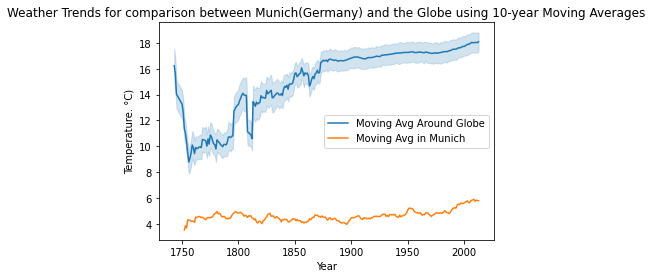

<Figure size 432x288 with 0 Axes>

In [171]:
#plot the globe data with a lineplot

sns.lineplot(x = "year", y = "Moving_avgg", data = globe, label = "Moving Avg Around Globe")
sns.lineplot(x = "year", y = "Moving_avgm", data = mun, label = "Moving Avg in Munich")

plt.legend()
plt.ylabel("Temperature. °C)")
plt.xlabel("Year")
plt.title("Weather Trends for comparison between Munich(Germany) and the Globe using 10-year Moving Averages")
plt.show()
plt.savefig('Global.jpeg')

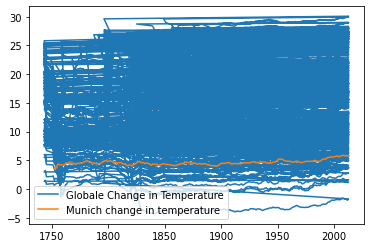

In [140]:
x1 = globe.year
y1 = globe['Moving_avg']
x2 = mun.year
y2 = mun['Moving_avg']

# plot lines
plt.plot(x1, y1, label = "Globale Change in Temperature")
plt.plot(x2, y2, label = "Munich change in temperature")
plt.legend()
plt.show()

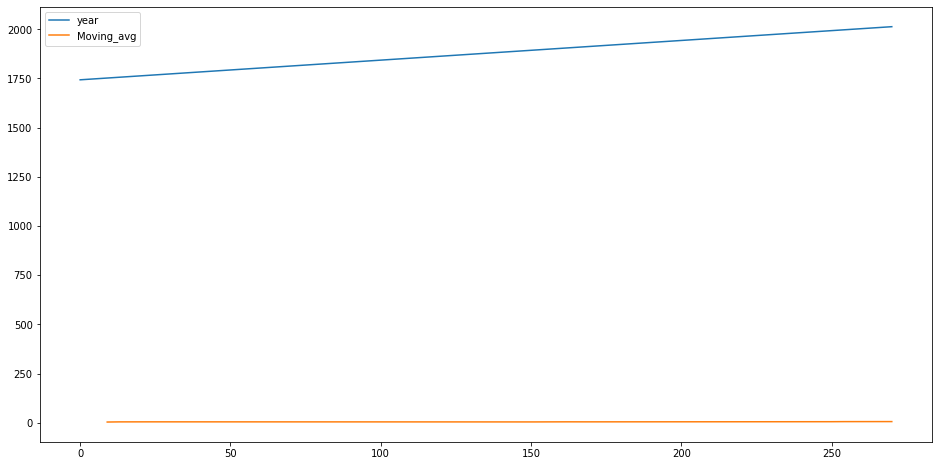

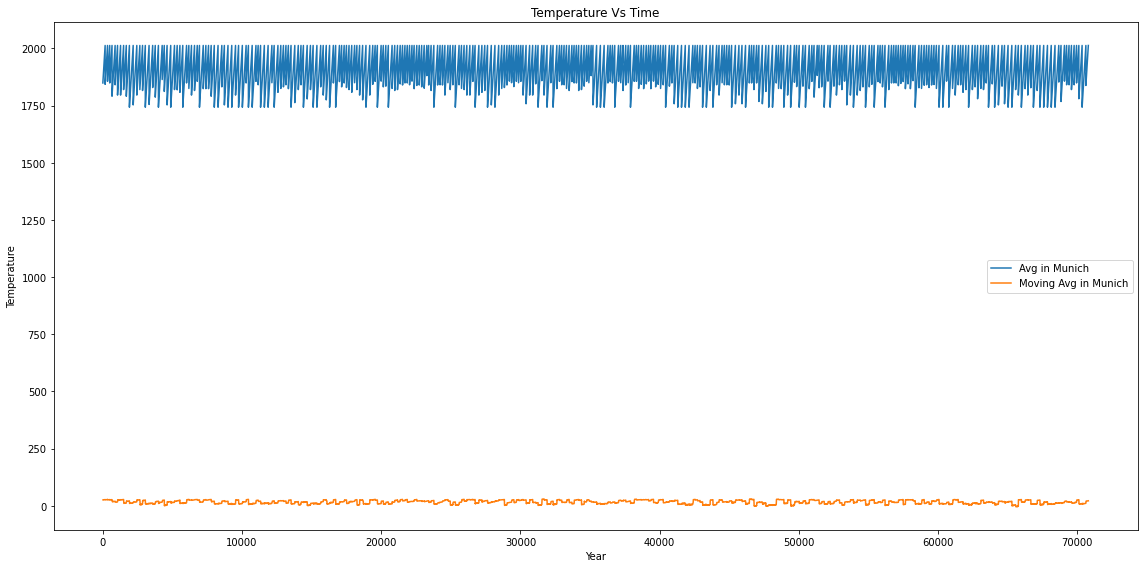

<Figure size 432x288 with 0 Axes>

In [126]:
mun['Moving_avg'].plot(figsize=(16, 8))
globe['Moving_avg'].plot(figsize=(16, 8))

plt.legend(["Avg in Munich", "Moving Avg in Munich"])
plt.ylabel("Temperature")
plt.xlabel("Year")
plt.title("Temperature Vs Time")
plt.tight_layout()
plt.show()
plt.savefig('Munich.jpeg')
